# lab 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.array([[1,-2,-1,-1,1],[2,-1,2,0,-2],[-1,0,2,2,1]])
Y = np.array([-7,-1,-1])
W = np.array([0,0,0,0,0])
lr = 0.02
steps = 200

## b

In [40]:
def loss_fn (x, y, w):
    loss = 0
    for i in range(len(x)):
        loss += (np.dot(x[i], w) - y[i])**2
    loss = sum((x@w-y)**2)
    return loss

def update (w, x, y, lr):
    grd = 0
    for i in range(len(x)):
        grd += 2 * x[i] * (np.dot(x[i], w) - y[i])
    return w - lr * grd

def loss_plot(loss_list):
    x_axis = np.arange(steps)
    plt.plot(x_axis, np.log(loss_list))
    plt.xlabel('steps')
    plt.ylabel('log of loss L')
    
def weight_plot(w0_list, w1_list, w2_list, w3_list, w4_list):
    x_axis = np.arange(steps)
    plt.plot(x_axis, w0_list, label = 'w_0')
    plt.plot(x_axis, w1_list, label = 'w_1')
    plt.plot(x_axis, w2_list, label = 'w_2')
    plt.plot(x_axis, w3_list, label = 'w_3')
    plt.plot(x_axis, w4_list, label = 'w_4')
    plt.xlabel('steps')
    plt.ylabel('weights')
    plt.legend()
    
def run(X, Y, W, lr, steps):
    loss_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    w4_list = []

    for i in range(steps):
        W = W - X.T @ (2*lr*(X@W - Y))
        loss = loss_fn(X, Y, W)
        
        loss_list.append(loss)
        w0_list.append(W[0])
        w1_list.append(W[1])
        w2_list.append(W[2])
        w3_list.append(W[3])
        w4_list.append(W[4])
    return loss_list, w0_list, w1_list, w2_list, w3_list, w4_list

In [41]:
loss_list, w0_list, w1_list, w2_list, w3_list, w4_list = run(X, Y, W, lr, steps)


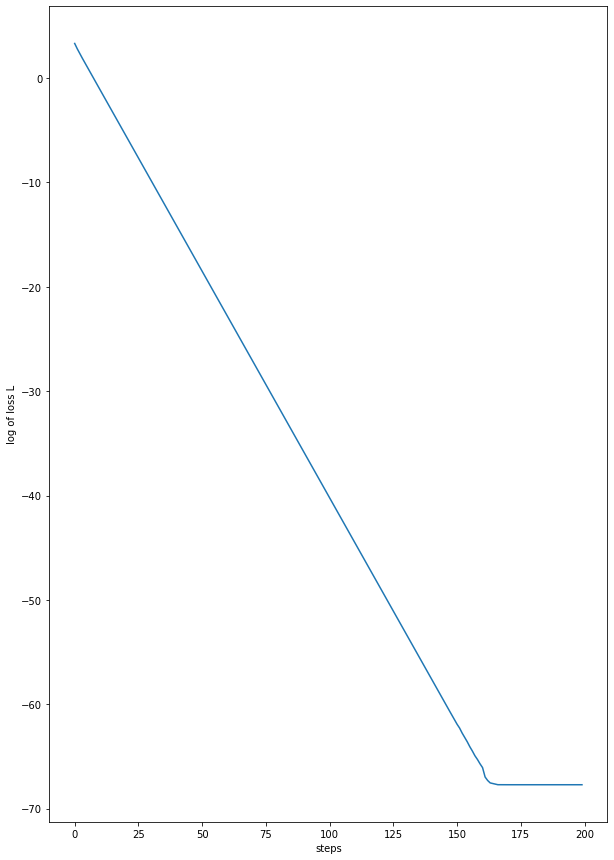

In [42]:
loss_plot(loss_list)

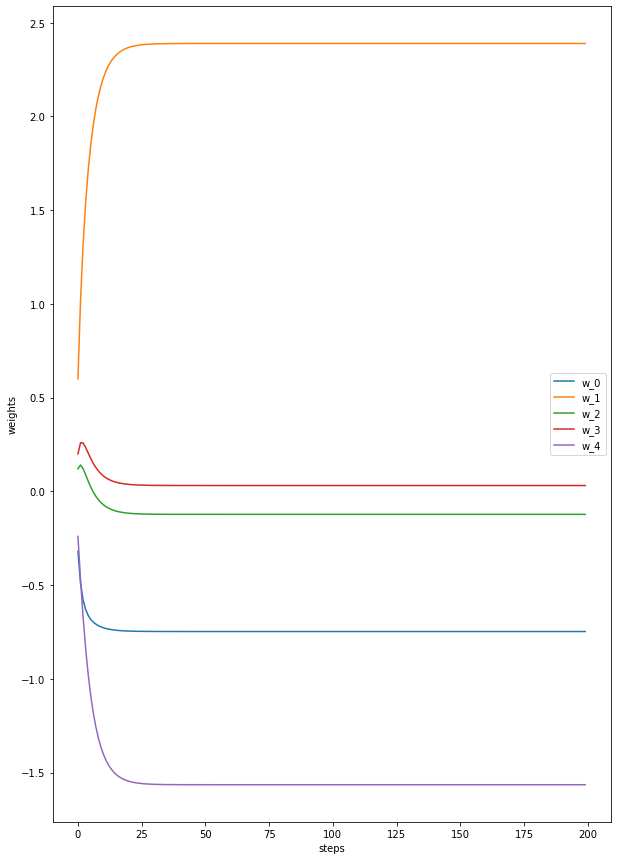

In [43]:
weight_plot(w0_list, w1_list, w2_list, w3_list, w4_list)

## c

In [7]:
def update_sparse (w, x, y, lr):
    grd = 0
    for i in range(len(x)):
        grd += 2 * x[i] * (np.dot(x[i], w) - y[i])
    w_new = w - lr * grd         
    thre = np.percentile(abs(w_new), 50)
    w_new = np.where(abs(w_new) <= thre, 0, w_new)
    return w_new

def run_sparse(X, Y, W, lr, steps):
    loss_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    w4_list = []

    for i in range(steps):        
        W = update_sparse(W, X, Y, lr)
        loss = loss_fn(X, Y, W)
        loss_list.append(loss)
        w0_list.append(W[0])
        w1_list.append(W[1])
        w2_list.append(W[2])
        w3_list.append(W[3])
        w4_list.append(W[4])
    return loss_list, w0_list, w1_list, w2_list, w3_list, w4_list

In [8]:
loss_list, w0_list, w1_list, w2_list, w3_list, w4_list = run_sparse(X, Y, W, lr, steps)

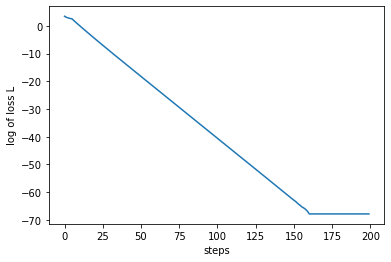

In [9]:
loss_plot(loss_list)

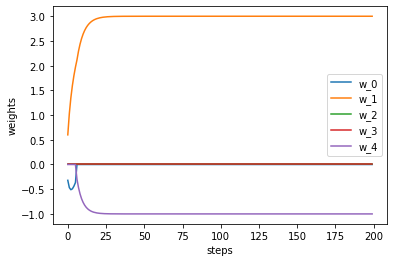

In [10]:
weight_plot(w0_list, w1_list, w2_list, w3_list, w4_list)

In [11]:
print(w0_list[-1],w2_list[-1], w3_list[-1])

0.0 0.0 0.0


## d

In [52]:
def update_L1 (w, x, y, lr, lam):
    grd = 0
    for i in range(len(x)):
        grd += (2 * x[i] * (np.dot(x[i], w) - y[i]) + lam * np.sign(w))
    w_new = w - lr * grd
    print(w_new)
    return w_new

def run_L1(X, Y, W, lr, steps, lam):
    loss_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    w4_list = []

    for i in range(steps):
        W = update_L1(W, X, Y, lr, lam)
        loss = loss_fn(X, Y, W)
        loss_list.append(loss)
        w0_list.append(W[0])
        w1_list.append(W[1])
        w2_list.append(W[2])
        w3_list.append(W[3])
        w4_list.append(W[4])
    return loss_list, w0_list, w1_list, w2_list, w3_list, w4_list

[-0.32  0.6   0.12  0.2  -0.24]
[-0.4744  1.0008  0.1288  0.2472 -0.4552]
[-0.556736  1.29296   0.105344  0.241216 -0.644288]
[-0.60259968  1.51399296  0.07213184  0.2154304  -0.803744  ]
[-0.62936955  1.68554399  0.038733    0.18463631 -0.93522278]
[-0.64566243  1.82096516  0.00880991  0.1550035  -1.04220594]
[-0.65585395  1.92906586 -0.01660057  0.12877235 -1.12852545]
[-0.66224583  2.01601427 -0.01356773  0.10645127 -1.19775894]
[-0.66706912  2.08633598 -0.01521484  0.08303428 -1.2501423 ]
[-0.67060883  2.14369498 -0.01767867  0.06052091 -1.28998636]
[-0.67309968  2.1908169  -0.01939254  0.03958326 -1.32022932]
[-0.67473605  2.22979091 -0.01983141  0.02031697 -1.34298067]
[-0.67567847  2.2622496  -0.01892373  0.00258749 -1.35981552]
[-0.67605873  2.28948413 -0.01677941 -0.01381402 -1.3719427 ]
[-0.67598452  2.31252303 -0.01356679 -0.00510341 -1.38030682]
[-6.72663376e-01  2.33026917e+00 -1.42595040e-02 -2.77078785e-04
 -1.38661458e+00]
[-0.6677023   2.34461136 -0.01655788  0.0029536

[-0.32  0.6   0.12  0.2  -0.24]
[-0.4264  0.9528  0.0808  0.1992 -0.4072]
[-0.476096  1.21808   0.040064  0.172096 -0.555968]
[-0.49684608  1.42452096  0.00354944  0.1373248  -0.6807872 ]
[-0.50226862  1.58913541 -0.02701394  0.10279823 -0.7819607 ]
[-0.49915985  1.72272149  0.06840689  0.07151674 -0.86200672]
[-0.49580139  1.83259028  0.00600265  0.02029538 -0.90964252]
[-0.48694208  1.92512037 -0.02954243 -0.01468192 -0.95074804]
[-0.47475654  2.00336012  0.06941715  0.07975019 -0.98343706]
[-0.45083394  2.06034703 -0.01054525  0.01201461 -0.99823316]
[-0.43083201  2.11518303  0.0690935  -0.02727777 -1.01253665]
[-0.41704598  2.16539552  0.00540428  0.04394607 -1.00907864]
[-0.38688689  2.20207337 -0.04973807 -0.00883801 -1.01473645]
[-0.36313117  2.24046384  0.04364234  0.08087436 -1.01871666]
[-0.33254091  2.26780013 -0.03596453  0.01390684 -1.01032354]
[-0.30842743  2.29992101  0.04626414 -0.0225976  -1.00592445]
[-0.29192768  2.33239623 -0.01424527  0.0519011  -0.98739537]
[-2.59

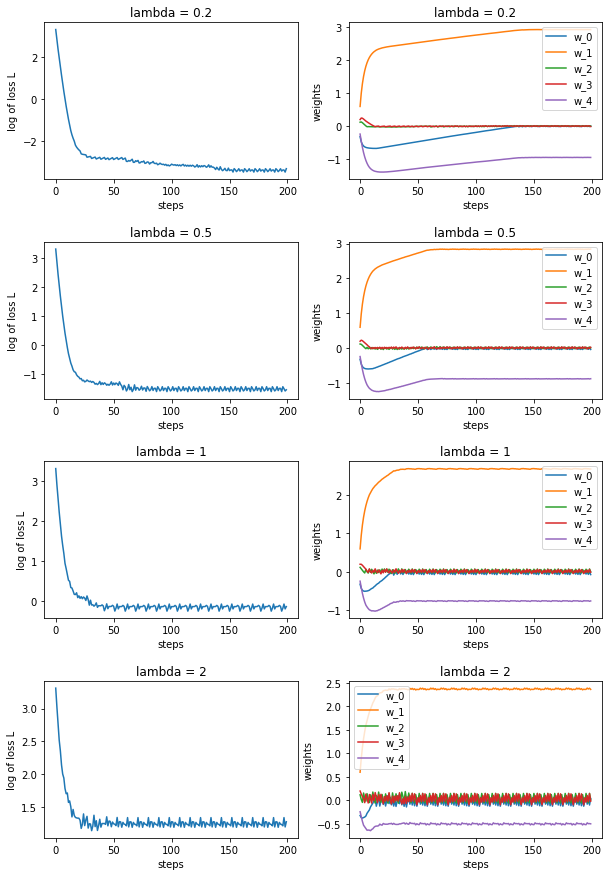

In [53]:
lam_list = [0.2, 0.5, 1, 2]

plt.rcParams["figure.figsize"] = (10,15)
plt.subplots_adjust(hspace = 0.4)
for (i,lam) in enumerate(lam_list):
    loss_list, w0_list, w1_list, w2_list, w3_list, w4_list = run_L1(X, Y, W, lr, steps, lam)
    plt.subplot(4, 2, 2*i+1)
    plt.title('lambda = ' + str(lam))
    loss_plot(loss_list)
    plt.subplot(4, 2, 2*i+2)
    plt.title('lambda = ' + str(lam))
    weight_plot(w0_list, w1_list, w2_list, w3_list, w4_list)

## e

In [ ]:
def update_L1_s (w, x, y, lr, lam):
    grd = 0
    for i in range(len(x)):
        grad_w = w.copy()
        for j in range(len(w))
            if w[j] > lr * lam:
                grad_w[j] = w[j] - lr
        grd += (2 * x[i] * (np.dot(x[i], w) - y[i]) + lam * np.sign(w))
    w_new = w - lr * grd         
    return w_new

def run_L1_s(X, Y, W, lr, steps, lam):
    loss_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    w4_list = []

    for i in range(steps):
        W = update_L1_s(W, X, Y, lr, lam)
        loss = loss_fn(X, Y, W)
        loss_list.append(loss)
        w0_list.append(W[0])
        w1_list.append(W[1])
        w2_list.append(W[2])
        w3_list.append(W[3])
        w4_list.append(W[4])
    return loss_list, w0_list, w1_list, w2_list, w3_list, w4_list

In [ ]:
loss_list, w0_list, w1_list, w2_list, w3_list, w4_list = run_L1(X, Y, W, lr, steps, 0.5)
loss_plot(loss_list)

In [ ]:
w=np.array([1,1,-2,-2,-2])
print(np.percentile(abs(w),50))

In [ ]:
print(np.where(w<=-3,1,w))

In [ ]:
w=np.array([0,0,1,1,2])
l=np.array([-1,0])
for i in range(len(w)):
        if abs(w[i]) > max(l):
            l[l == min(l)] = abs(w[i])
            print(l)
for i in range(len(w)):
    if not w[i] in l:
        w[i] = 0
    print(w)

In [ ]:
w=np.array([0,-3,1,1,2])
thre = np.percentile(abs(w), 50)
w_new = np.where(w <= thre, 0, w)
print(w_new)

In [ ]:
print(l)